### Figures for the 1d Chebyshev interpolation simulations.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from tools import merge_pkl, read_field, create_subplots, fit_power_law, fit_exponential

# Force imported libraries and modules to auto-reload
%load_ext autoreload
%autoreload 2

DATA_PATH = "data/"
SHOW_FIGURES = True

In [2]:
# Set parameter ranges
range_n = list(range(2, 25 + 1))
range_d = (
    list(range(2, 10)) + list(range(10, 100, 10)) + list(range(100, 1300 + 1, 100))
)
range_t = [10 ** -(exp) for exp in range(1, 14 + 1)]

# Set fixed parameters
fixed_n = 25
fixed_d = 1300
fixed_t = 1e-14
max_d_g = 50

# Load the data with respect to ranging the number of qubits n
params_n = {"n": range_n, "d": max_d_g, "t": fixed_t}
data_n_g = merge_pkl(params_n, name="chebyshev_1d_gaussian", path=DATA_PATH)
params_n["d"] = fixed_d
data_n_o = merge_pkl(params_n, name="chebyshev_1d_osc", path=DATA_PATH)
data_n_a = merge_pkl(params_n, name="chebyshev_1d_abs", path=DATA_PATH)
data_n_s = merge_pkl(params_n, name="chebyshev_1d_step", path=DATA_PATH)

# Load the data with respect to ranging the order d
range_d_g = np.array(range_d)[np.array(range_d) <= max_d_g]
params_d = {"n": fixed_n, "d": range_d_g, "t": fixed_t}
data_d_g = merge_pkl(params_d, name="chebyshev_1d_gaussian", path=DATA_PATH)
params_d["d"] = range_d
data_d_o = merge_pkl(params_d, name="chebyshev_1d_osc", path=DATA_PATH)
data_d_a = merge_pkl(params_d, name="chebyshev_1d_abs", path=DATA_PATH)
data_d_s = merge_pkl(params_d, name="chebyshev_1d_step", path=DATA_PATH)

# Load up results for the other functions with respect to t
params_t = {"n": fixed_n, "d": max_d_g, "t": range_t}
data_t_g = merge_pkl(params_t, name="chebyshev_1d_gaussian", path=DATA_PATH)
params_t["d"] = fixed_d
data_t_o = merge_pkl(params_t, name="chebyshev_1d_osc", path=DATA_PATH)
data_t_a = merge_pkl(params_t, name="chebyshev_1d_abs", path=DATA_PATH)
data_t_s = merge_pkl(params_t, name="chebyshev_1d_step", path=DATA_PATH)

In [3]:
from tools import set_plot_parameters, STYLE_FIT_1, STYLE_FIT_2

set_plot_parameters()

# fmt: off
# Styles
STYLE_G = {"linestyle": "solid", "marker": None, "color": "tab:blue"}
STYLE_G_SVD = {"linestyle": (0, (1, 1)), "marker": None, "color": "tab:blue", "linewidth": 2.5}

STYLE_O = {"linestyle": (0, (5, 1)), "marker": None, "color": "tab:red"}
STYLE_O_SVD = {"linestyle": (0, (1, 1)), "marker": None, "color": "tab:red", "linewidth": 2.5}

STYLE_A = {"linestyle": "dashdot", "marker": None, "color": "tab:orange"}
STYLE_A_SVD = {"linestyle": (0, (1, 1)), "marker": None, "color": "tab:orange", "linewidth": 2.5}

STYLE_S = {"linestyle": (0, (3, 1, 1, 1, 1, 1)), "marker": None, "color": "tab:green"}
STYLE_S_SVD = {"linestyle": (0, (1, 1)), "marker": None, "color": "tab:green", "linewidth": 2.5}

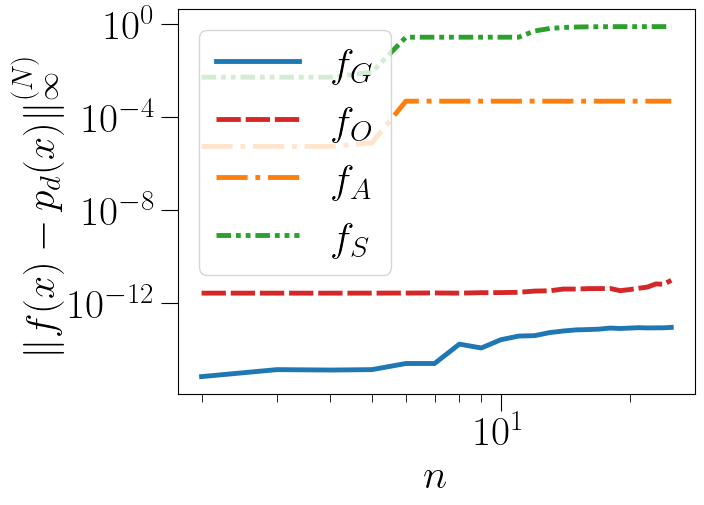

In [4]:
def plot_norms_n(ax):
    ax.loglog(range_n, read_field(data_n_g, "error"), **STYLE_G, label=r"$f_G$")
    ax.loglog(range_n, read_field(data_n_o, "error"), **STYLE_O, label=r"$f_O$")
    ax.loglog(range_n, read_field(data_n_a, "error"), **STYLE_A, label=r"$f_A$")
    ax.loglog(range_n, read_field(data_n_s, "error"), **STYLE_S, label=r"$f_S$")
    ax.legend()


if SHOW_FIGURES:
    fig, ax = create_subplots()
    plot_norms_n(ax)
    ax.set_xlabel(r"$n$")
    ax.set_ylabel(r"$\Vert f(x) - p_d(x)\Vert^{(N)}_{\infty}$")

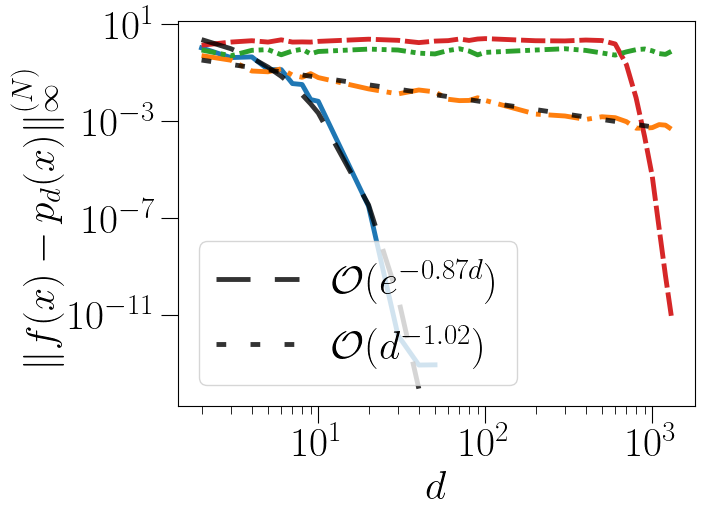

In [5]:
# fmt: off
def plot_norms_d(ax):
    ax.loglog(range_d_g, read_field(data_d_g, "error"), **STYLE_G)
    ax.loglog(range_d, read_field(data_d_o, "error"), **STYLE_O)
    ax.loglog(range_d, read_field(data_d_a, "error"), **STYLE_A)
    ax.loglog(range_d, read_field(data_d_s, "error"), **STYLE_S)
    fit_exponential(ax, range_d_g, read_field(data_d_g, "error"), label="d", fit_range=slice(0, 12), style=STYLE_FIT_1)
    fit_power_law(ax, range_d, read_field(data_d_a, "error"), label="d", style=STYLE_FIT_2)
    ax.legend(loc='lower left')


if SHOW_FIGURES:
	fig, ax = create_subplots()
	plot_norms_d(ax)
	ax.set_xlabel(r"$d$")
	ax.set_ylabel(r"$\Vert f(x) - p_d(x)\Vert^{(N)}_{\infty}$")

<>:7: SyntaxWarning: invalid escape sequence '\e'
<>:7: SyntaxWarning: invalid escape sequence '\e'
/tmp/ipykernel_260758/2989085895.py:7: SyntaxWarning: invalid escape sequence '\e'
  fit_power_law(ax, range_t, read_field(data_t_g, "error"), label="\epsilon", style=STYLE_FIT_1)


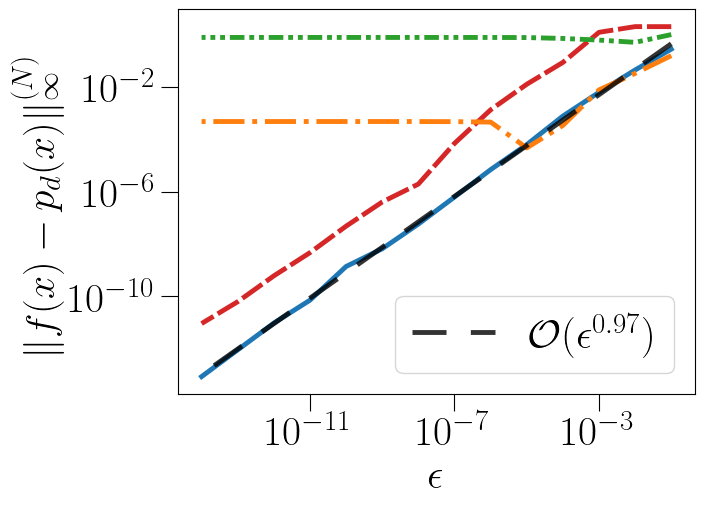

In [6]:
# fmt: off
def plot_norms_t(ax):
    ax.loglog(range_t, read_field(data_t_g, "error"), **STYLE_G)
    ax.loglog(range_t, read_field(data_t_o, "error"), **STYLE_O)
    ax.loglog(range_t, read_field(data_t_a, "error"), **STYLE_A)
    ax.loglog(range_t, read_field(data_t_s, "error"), **STYLE_S)
    fit_power_law(ax, range_t, read_field(data_t_g, "error"), label="\epsilon", style=STYLE_FIT_1)
    ax.legend()


if SHOW_FIGURES:
    fig, ax = create_subplots()
    plot_norms_t(ax)
    ax.set_xlabel(r"$\epsilon$")
    ax.set_ylabel(r"$\Vert f(x) - p_d(x)\Vert^{(N)}_{\infty}$")

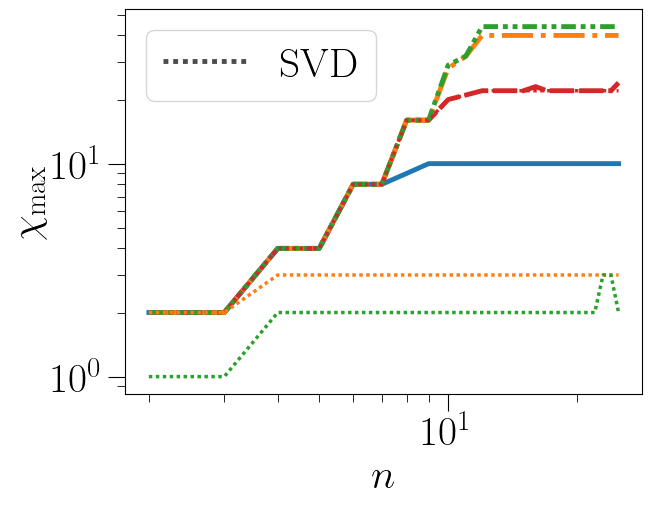

In [7]:
def plot_bonds_n(ax):
    ax.loglog(range_n, read_field(data_n_g, "maxbond"), **STYLE_G)
    ax.loglog(range_n, read_field(data_n_o, "maxbond"), **STYLE_O)
    ax.loglog(range_n, read_field(data_n_a, "maxbond"), **STYLE_A)
    ax.loglog(range_n, read_field(data_n_s, "maxbond"), **STYLE_S)
    ax.loglog(range_n, read_field(data_n_g, "maxbond_svd"), **STYLE_G_SVD)
    ax.loglog(range_n, read_field(data_n_o, "maxbond_svd"), **STYLE_O_SVD)
    ax.loglog(range_n, read_field(data_n_a, "maxbond_svd"), **STYLE_A_SVD)
    ax.loglog(range_n, read_field(data_n_s, "maxbond_svd"), **STYLE_S_SVD)
    svd_line = plt.Line2D([], [], color="k", linestyle=(0, (1, 1)), alpha=0.7)
    ax.legend([svd_line], ["SVD"])


if SHOW_FIGURES:
    fig, ax = create_subplots()
    plot_bonds_n(ax)
    ax.set_xlabel(r"$n$")
    ax.set_ylabel(r"$\chi_{\mathrm{max}}$")

/tmp/ipykernel_260758/3423240544.py:14: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  ax.set_ylim(0, ymax + 10)


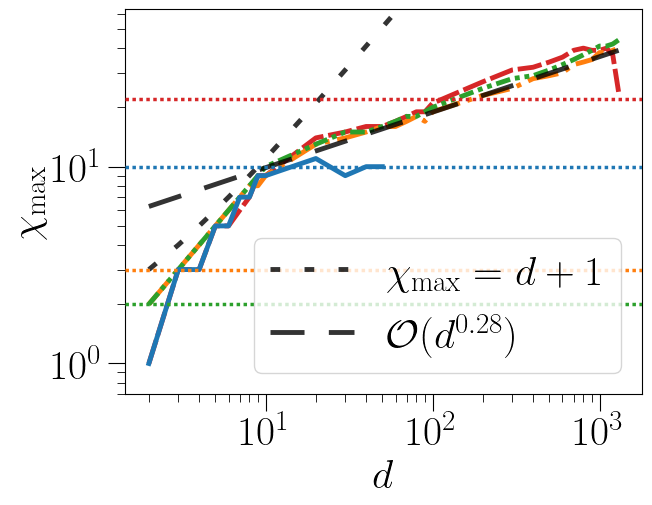

In [8]:
# fmt: off
def plot_bonds_d(ax):
    ax.loglog(range_d_g, read_field(data_d_g, "maxbond"), **STYLE_G, zorder=3)
    ax.loglog(range_d, read_field(data_d_o, "maxbond"), **STYLE_O, zorder=1)
    ax.loglog(range_d, read_field(data_d_a, "maxbond"), **STYLE_A, zorder=1)
    ax.loglog(range_d, read_field(data_d_s, "maxbond"), **STYLE_S, zorder=1)
    _, ymax = plt.ylim()  # Place it in the subplot instead

    ax.loglog(range_d, np.array(range_d) + 1, **STYLE_FIT_2, label=r"$\chi_{\mathrm{max}} = d+1$")
    ax.axhline(y=read_field(data_d_g, "maxbond_svd")[0], **STYLE_G_SVD, zorder=4)
    ax.axhline(y=read_field(data_d_o, "maxbond_svd")[0], **STYLE_O_SVD, zorder=4)
    ax.axhline(y=read_field(data_d_a, "maxbond_svd")[0], **STYLE_A_SVD, zorder=4)
    ax.axhline(y=read_field(data_d_s, "maxbond_svd")[0], **STYLE_S_SVD, zorder=4)
    ax.set_ylim(0, ymax + 10)
    
    fit_power_law(ax, range_d, read_field(data_d_a, "maxbond"), fit_range=slice(10, -1), plot_range=slice(None), label='d', style=STYLE_FIT_1)
    ax.legend()
    

if SHOW_FIGURES:
	fig, ax = create_subplots()
	plot_bonds_d(ax)
	ax.set_xlabel(r"$d$")
	ax.set_ylabel(r"$\chi_{\mathrm{max}}$")

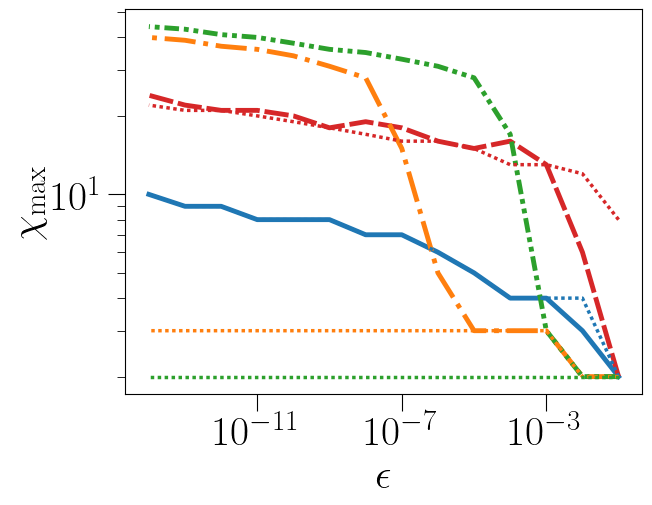

In [9]:
def plot_bonds_t(ax):
    ax.loglog(range_t, read_field(data_t_g, "maxbond"), **STYLE_G)
    ax.loglog(range_t, read_field(data_t_o, "maxbond"), **STYLE_O)
    ax.loglog(range_t, read_field(data_t_a, "maxbond"), **STYLE_A)
    ax.loglog(range_t, read_field(data_t_s, "maxbond"), **STYLE_S)
    ax.loglog(range_t, read_field(data_t_g, "maxbond_svd"), **STYLE_G_SVD)
    ax.loglog(range_t, read_field(data_t_o, "maxbond_svd"), **STYLE_O_SVD)
    ax.loglog(range_t, read_field(data_t_a, "maxbond_svd"), **STYLE_A_SVD)
    ax.loglog(range_t, read_field(data_t_s, "maxbond_svd"), **STYLE_S_SVD)


if SHOW_FIGURES:
    fig, ax = create_subplots()
    plot_bonds_t(ax)
    ax.set_xlabel(r"$\epsilon$")
    ax.set_ylabel(r"$\chi_{\mathrm{max}}$")

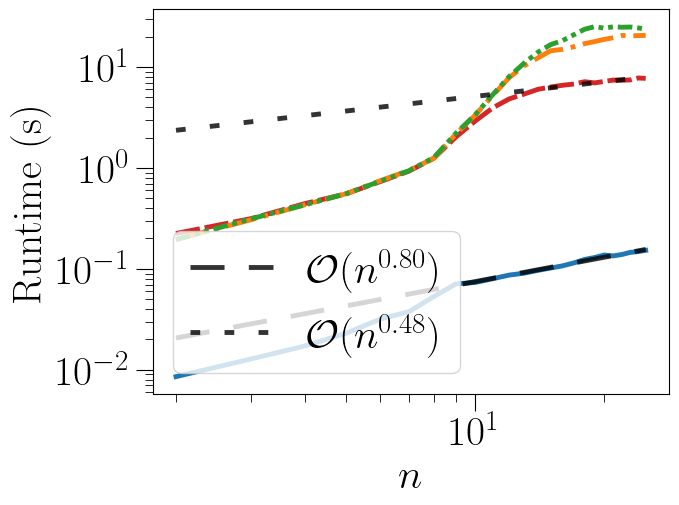

In [10]:
# fmt: off
def plot_times_n(ax):
    ax.loglog(range_n, read_field(data_n_g, "time"), **STYLE_G)
    ax.loglog(range_n, read_field(data_n_o, "time"), **STYLE_O)
    ax.loglog(range_n, read_field(data_n_a, "time"), **STYLE_A)
    ax.loglog(range_n, read_field(data_n_s, "time"), **STYLE_S)
    fit_power_law(ax, range_n, read_field(data_n_g, "time"), fit_range=slice(7, 25), plot_range=slice(None), label='n', style=STYLE_FIT_1)
    fit_power_law(ax, range_n, read_field(data_n_o, "time"), fit_range=slice(11, 25), plot_range=slice(None), label='n', style=STYLE_FIT_2)
    ax.legend(loc='lower left')


if SHOW_FIGURES:
	fig, ax = create_subplots()
	plot_times_n(ax)
	ax.set_xlabel(r"$n$")
	ax.set_ylabel("Runtime (s)")

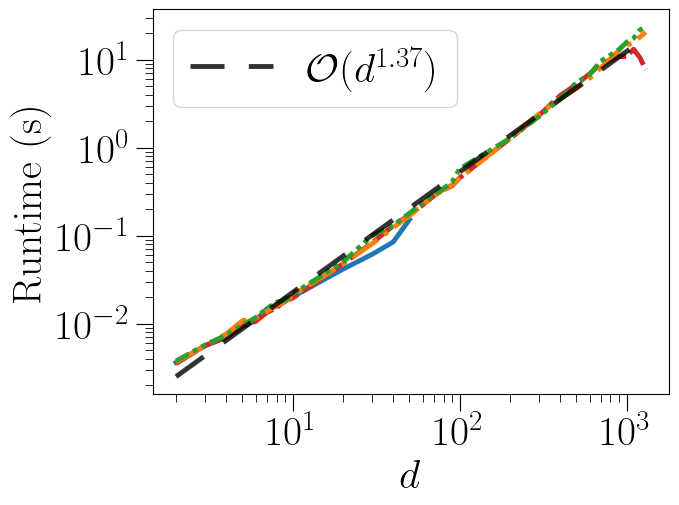

In [11]:
# fmt: off
def plot_times_d(ax):
    ax.loglog(range_d_g, read_field(data_d_g, "time"), **STYLE_G)
    ax.loglog(range_d, read_field(data_d_o, "time"), **STYLE_O)
    ax.loglog(range_d, read_field(data_d_a, "time"), **STYLE_A)
    ax.loglog(range_d, read_field(data_d_s, "time"), **STYLE_S)
    fit_power_law(ax, range_d, read_field(data_d_a, "time"), label="d", style=STYLE_FIT_1)
    ax.legend()


if SHOW_FIGURES:
    fig, ax = create_subplots()
    plot_times_d(ax)
    ax.set_xlabel(r"$d$")
    ax.set_ylabel("Runtime (s)")
    plt.tick_params(axis='y', which='minor')

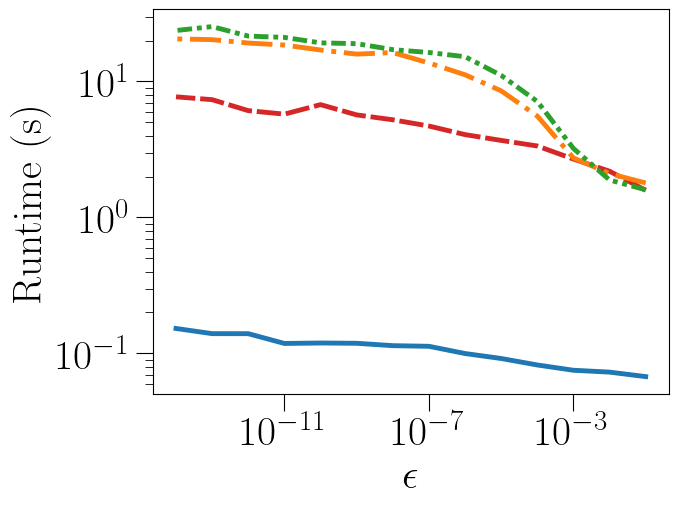

In [12]:
def plot_times_t(ax):
    ax.loglog(range_t, read_field(data_t_g, "time"), **STYLE_G)
    ax.loglog(range_t, read_field(data_t_o, "time"), **STYLE_O)
    ax.loglog(range_t, read_field(data_t_a, "time"), **STYLE_A)
    ax.loglog(range_t, read_field(data_t_s, "time"), **STYLE_S)


if SHOW_FIGURES:
    fig, ax = create_subplots()
    plot_times_t(ax)
    ax.set_xlabel(r"$\epsilon$")
    ax.set_ylabel("Runtime (s)")

### Draw the plots together

/tmp/ipykernel_260758/3423240544.py:14: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  ax.set_ylim(0, ymax + 10)
/tmp/ipykernel_260758/170759837.py:41: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  ax.set_ylim(0, ymax + 20)


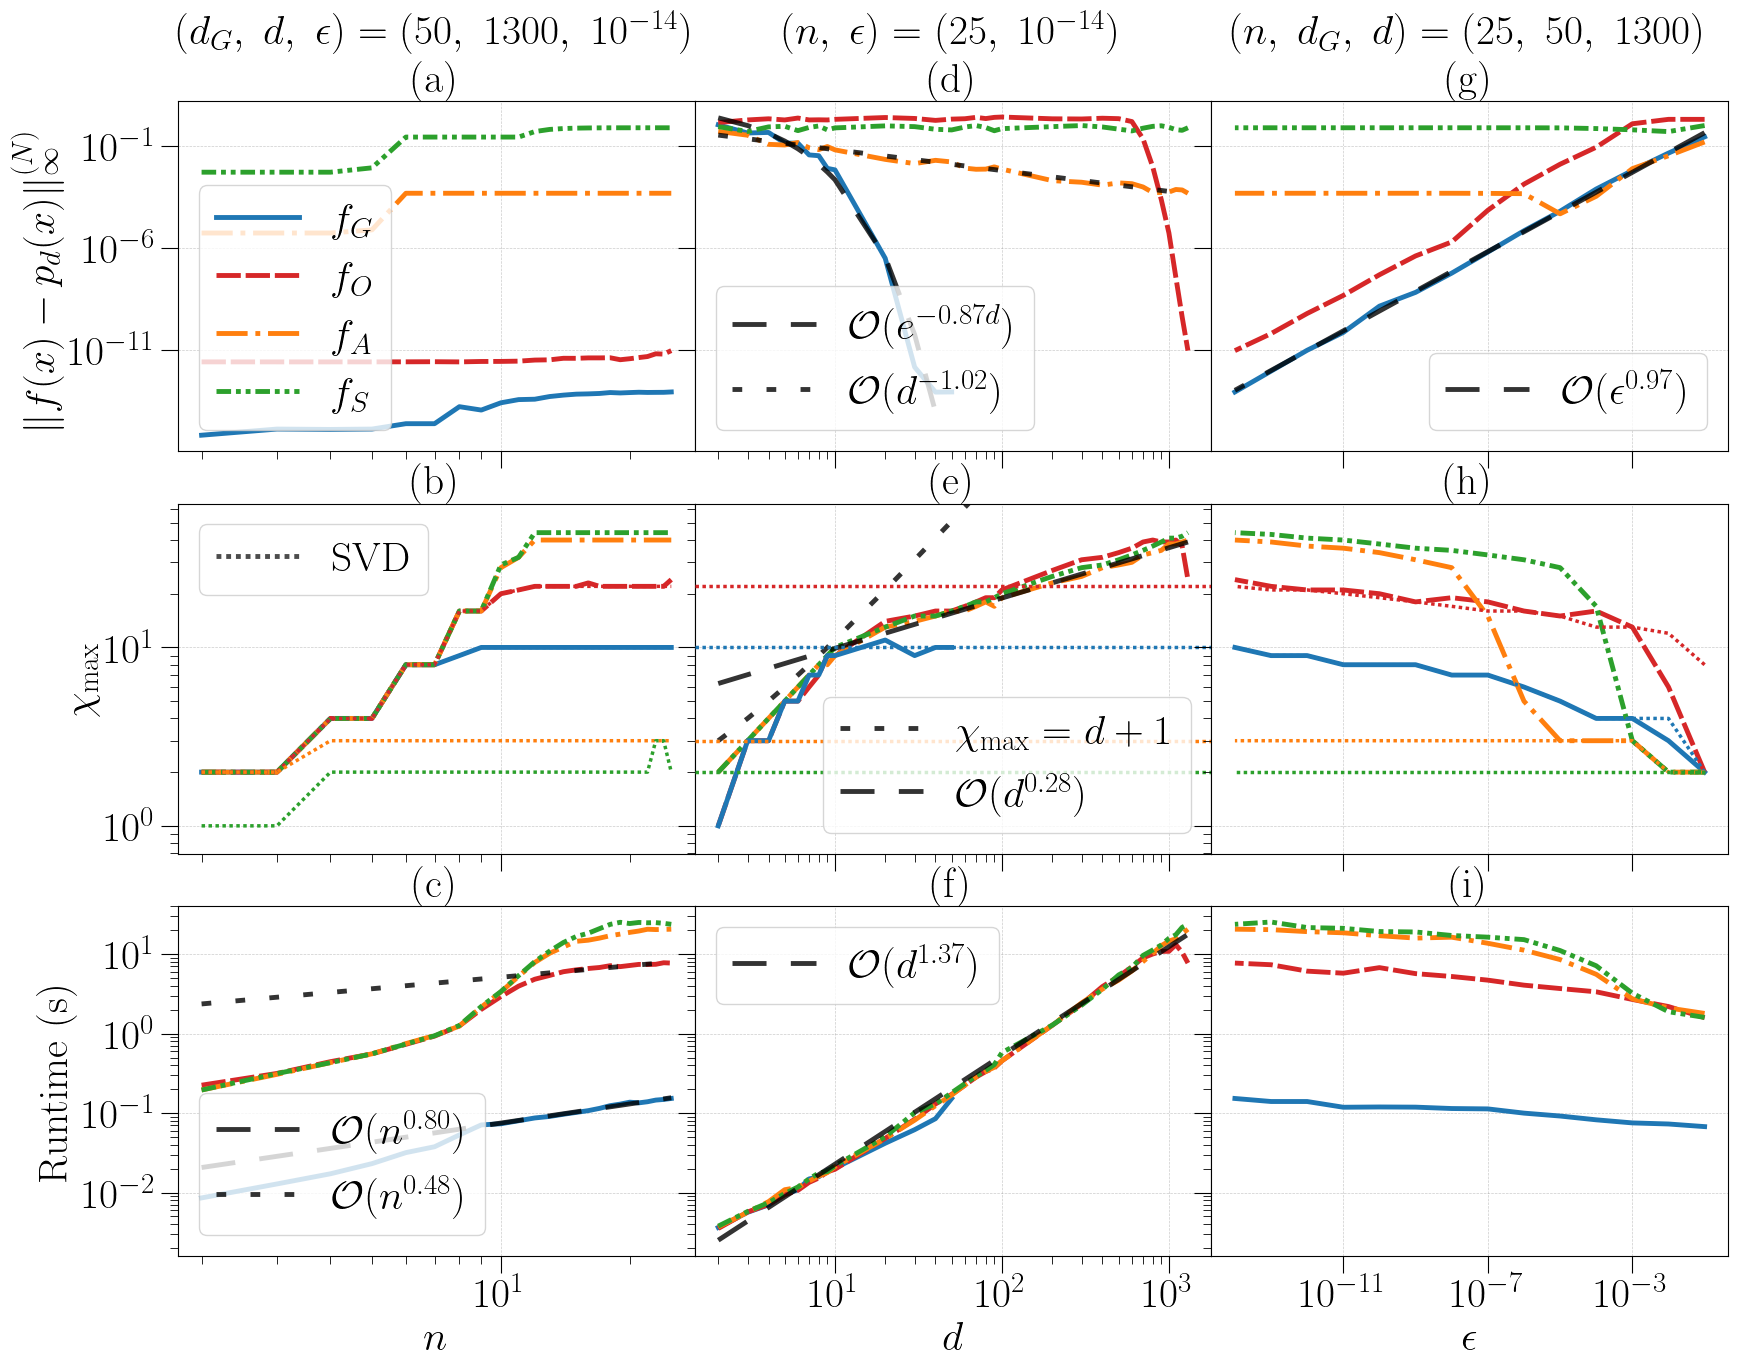

In [13]:
# fmt: off
from matplotlib import ticker
fig, axs = create_subplots(3, 3, sharex='col', sharey='row')

plot_norms_n(axs[0, 0])
plot_norms_d(axs[0, 1])
plot_norms_t(axs[0, 2])
plot_bonds_n(axs[1, 0])
plot_bonds_d(axs[1, 1])
plot_bonds_t(axs[1, 2])
plot_times_n(axs[2, 0])
plot_times_d(axs[2, 1])
plot_times_t(axs[2, 2])

column_labels = [r"$n$", r"$d$", r"$\epsilon$"]
for ax, col in zip(axs[2], column_labels):
    ax.set_xlabel(col)

row_labels = [
    r"$\Vert f(x) - p_d(x)\Vert^{(N)}_{\infty}$",
    r"$\chi_{\mathrm{max}}$",
    "Runtime (s)",
]
for ax, row in zip(axs[:, 0], row_labels):
    ax.set_ylabel(row)

for i, ax in enumerate(axs.flat):
    rows, cols = axs.shape 
    col_wise_index = np.ravel_multi_index(np.unravel_index(i, (rows, cols), order='F'), (cols, rows))
    ax.set_title(f"(" + chr(ord("a") + col_wise_index) + ")")
    ax.grid(which="major")
    ax.xaxis.set_minor_locator(ticker.LogLocator(numticks=999, subs="auto"))
    ax.yaxis.set_minor_locator(ticker.LogLocator(numticks=999, subs="auto"))

axs[0, 0].set_title(r"$(d_G, \ d, \ \epsilon) = (50, \ 1300, \ 10^{-14})$" + "\n (a)")
axs[0, 1].set_title(r"$(n, \ \epsilon) = (25, \ 10^{-14})$" + "\n (d)")
axs[0, 2].set_title(r"$(n, \ d_G, \ d) = (25, \ 50, \ 1300)$" + "\n (g)")

ymax = np.max(read_field(data_d_s, "maxbond"))
for ax in axs[1, :]:  # Loop through the second row
    ax.set_ylim(0, ymax + 20)

fig.subplots_adjust(hspace=0.15, wspace=0.0)
plt.savefig("figures/chebyshev_1d.pdf", dpi=300, bbox_inches="tight")

### Plot of the intermediate bond dimension structure

In [14]:
from seemps.state import Strategy, Simplification, Truncation
from seemps.analysis.mesh import RegularInterval

from seemps.analysis.chebyshev import interpolation_coefficients
from tools.chebyshev_bonds import cheb2mps

In [ ]:
n, d, t = 25, 1300, 10 ** (-14)
domain = RegularInterval(-1, 1, 2**n)

eps = 1 / 100
func_o = lambda x: np.cos(1 / (x + eps))

strategy = Strategy(
    tolerance=t**2,
    simplification_tolerance=t**2,
    method=Truncation.RELATIVE_NORM_SQUARED_ERROR,
    simplify=Simplification.VARIATIONAL,
)

coeffs = interpolation_coefficients(func_o, d, domain=domain)
_, bonds = cheb2mps(coeffs, domain=domain, strategy=strategy, clenshaw=True)

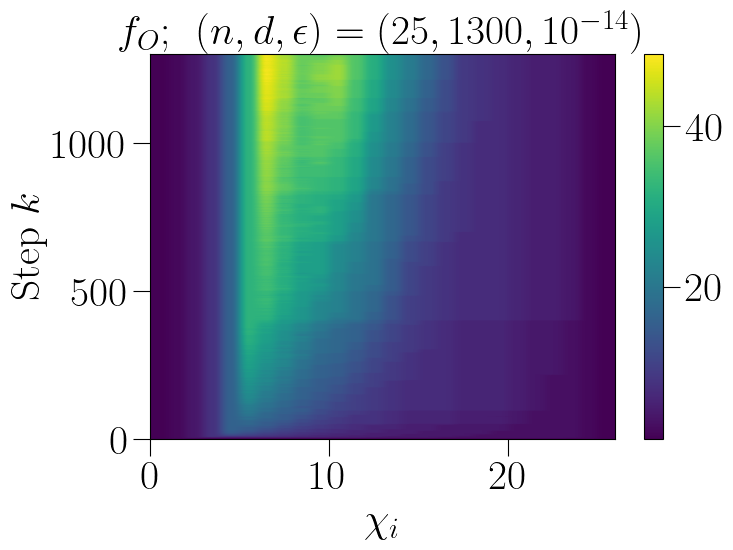

In [ ]:
# fmt: off
fig, ax = create_subplots(aspect_ratio=12/8)
im = ax.imshow(np.flipud(bonds), cmap="viridis", aspect="auto", extent=[0, bonds.shape[1], 0, bonds.shape[0]])
cbar = fig.colorbar(im, ax=ax)
ax.set_title(r"$f_O$; \ $(n,d,\epsilon) = (25, 1300, 10^{-14})$")
ax.set_xlabel(r"$\chi_{i}$")
ax.set_ylabel(r"Step $k$")

plt.savefig("figures/chebyshev_1d_bonds.pdf", dpi=300, bbox_inches="tight")